In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_unn.npy')

In [3]:
X_test = images[2893:3616]
y_test = masks[2893:3616]

In [4]:
images = images[0:2893]
masks = masks[0:2893]

In [5]:
images.shape

(2893, 512, 512, 1)

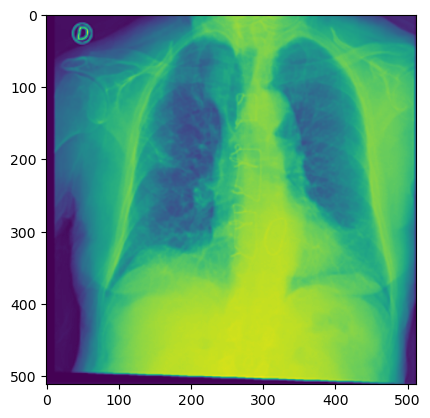

In [6]:
imshow(images[100])

In [7]:
masks.shape

(2893, 512, 512, 1)

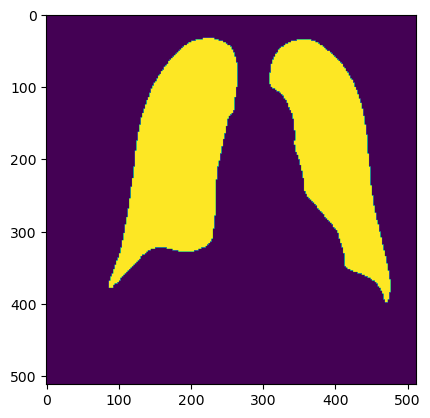

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpofrf4l4wkuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpv8eq1af0kuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpv8eq1af0kuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_5_covid.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
9/9 [==============================] - 16s 705ms/step - loss: 0.4618 - dice_coeff: 0.4562 - val_loss: 0.4171 - val_dice_coeff: 0.4365
Epoch 2/100
9/9 [==============================] - 4s 517ms/step - loss: 0.4223 - dice_coeff: 0.4473 - val_loss: 0.3958 - val_dice_coeff: 0.4516
Epoch 3/100
9/9 [==============================] - 4s 518ms/step - loss: 0.3985 - dice_coeff: 0.4668 - val_loss: 0.3777 - val_dice_coeff: 0.4795
Epoch 4/100
9/9 [==============================] - 5s 528ms/step - loss: 0.3790 - dice_coeff: 0.5131 - val_loss: 0.3490 - val_dice_coeff: 0.5487
Epoch 5/100
9/9 [==============================] - 4s 511ms/step - loss: 0.3678 - dice_coeff: 0.5519 - val_loss: 0.3652 - val_dice_coeff: 0.5271
Epoch 6/100
9/9 [==============================] - 4s 516ms/step - loss: 0.3761 - dice_coeff: 0.5302 - val_loss: 0.3567 - val_dice_coeff: 0.5124
Epoch 7/100
9/9 [==============================] - 4s 515ms/step - loss: 0.3676 - dic

In [16]:
R.classifier_scores

[[0.343173086643219, 0.571858286857605],
 [0.3638221323490143, 0.5158653855323792],
 [0.3484475314617157, 0.5645582675933838],
 [0.3393344283103943, 0.561726987361908],
 [0.33752408623695374, 0.5680590867996216]]

In [17]:
R.discriminator_scores

[[2.6873721026277053e-08, 1.0],
 [6.481967375293607e-06, 1.0],
 [0.00010673791985027492, 1.0],
 [4.000765329692513e-06, 1.0],
 [5.484753273776732e-07, 1.0]]

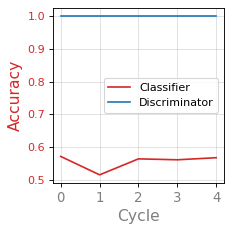

In [18]:
R.plot()

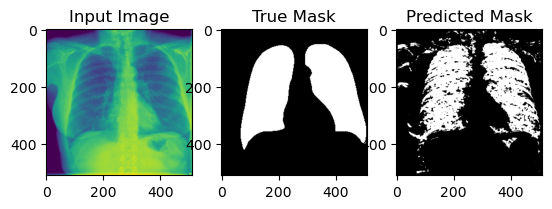

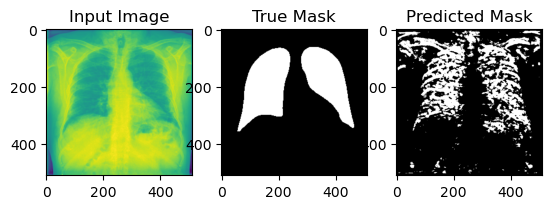

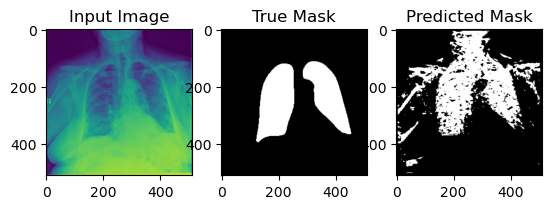

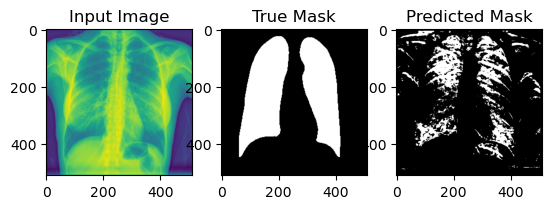

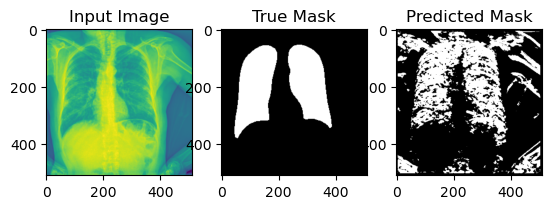

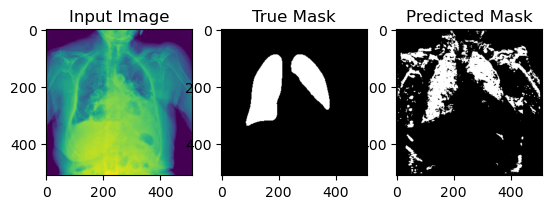

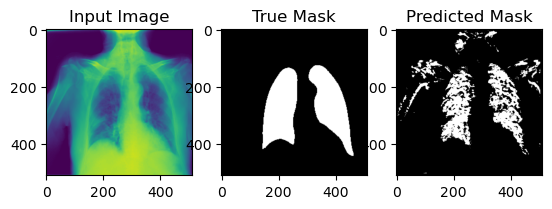

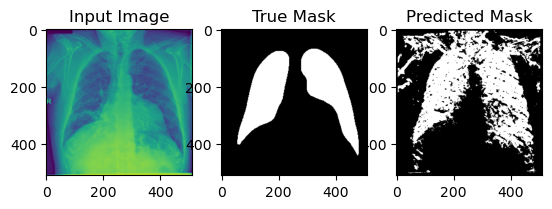

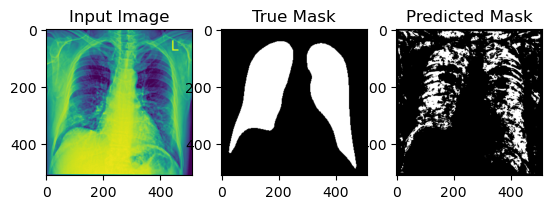

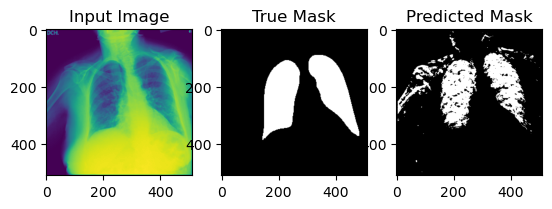

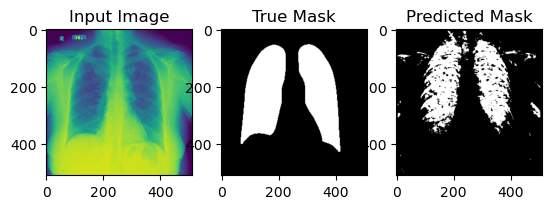

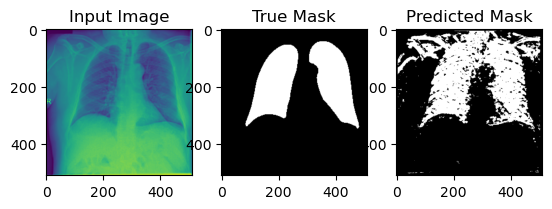

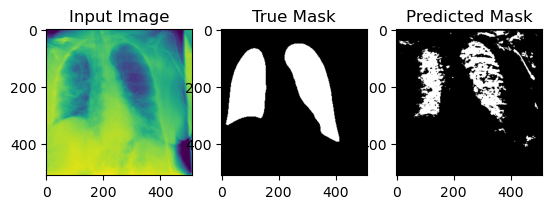

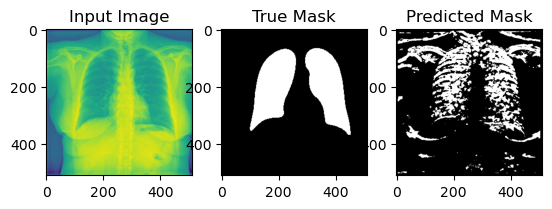

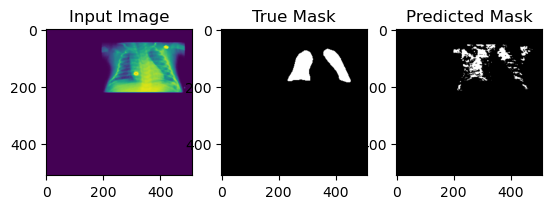

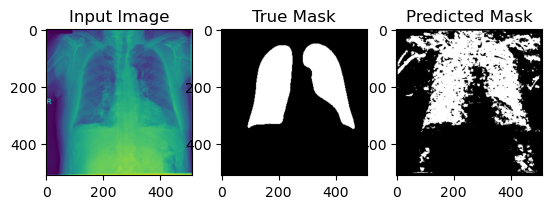

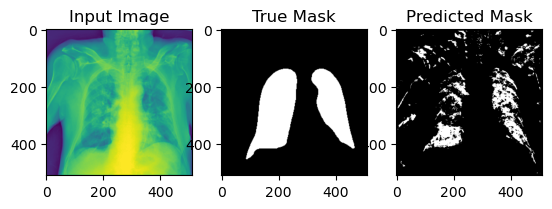

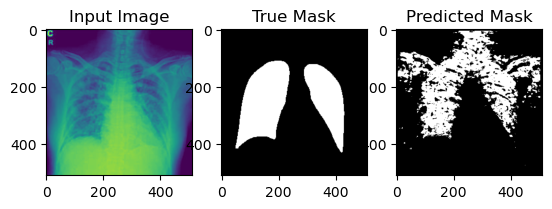

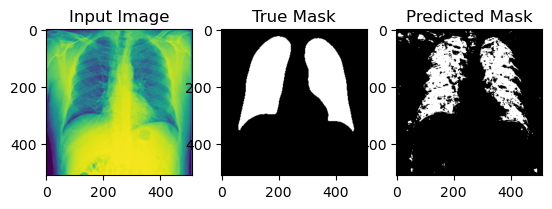

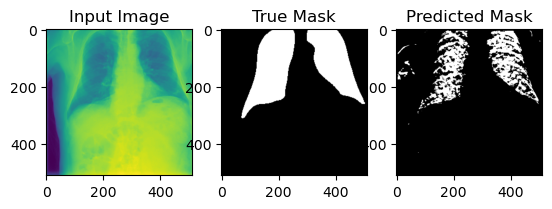

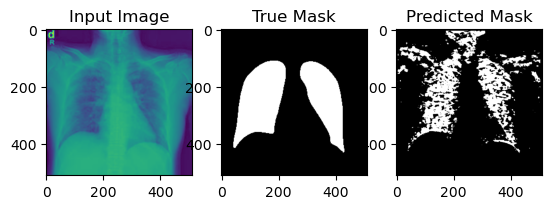

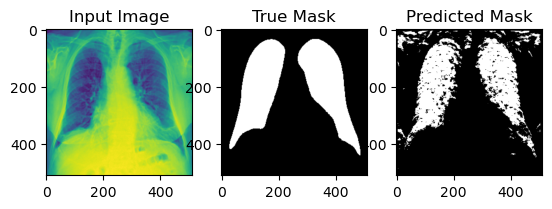

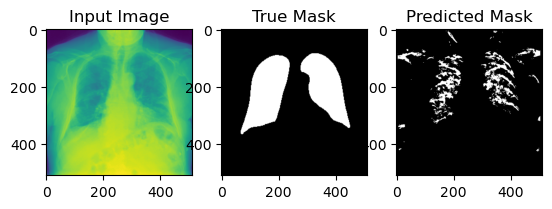

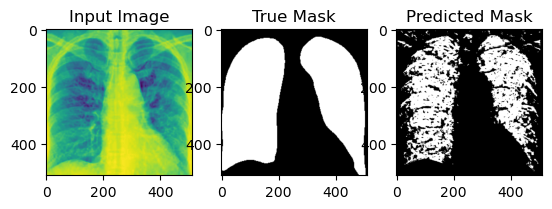

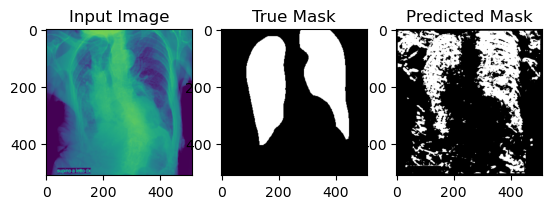

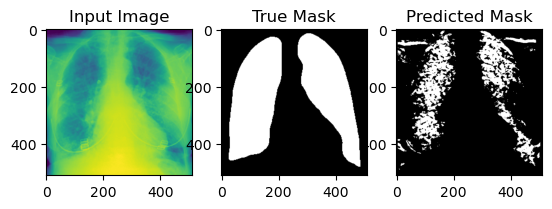

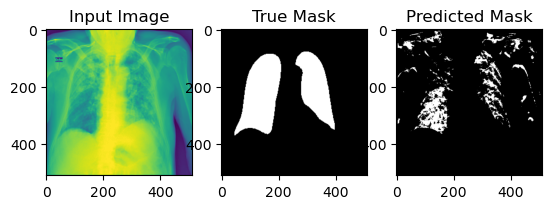

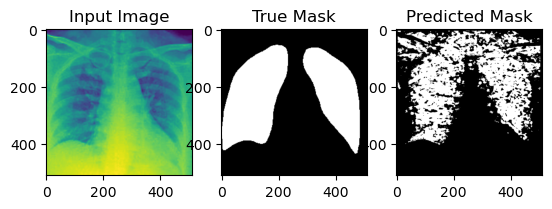

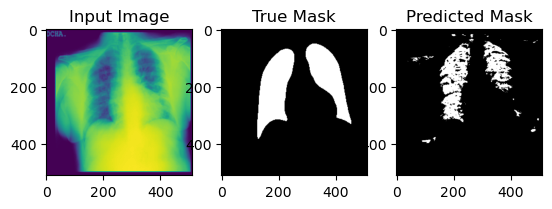

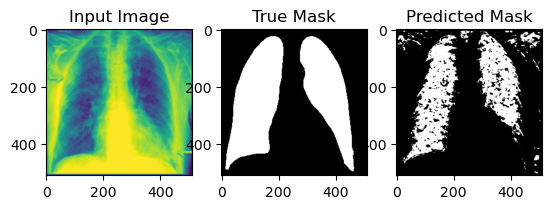

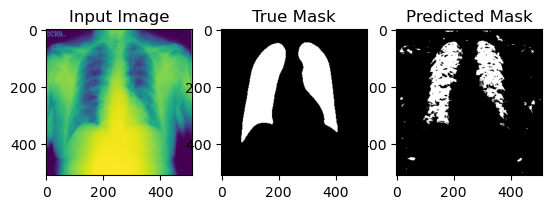

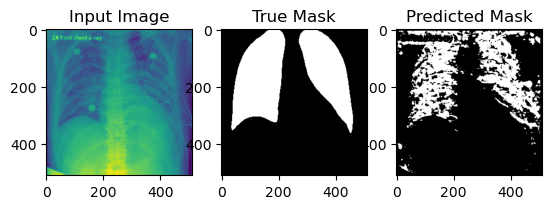

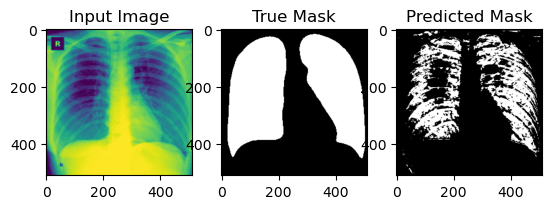

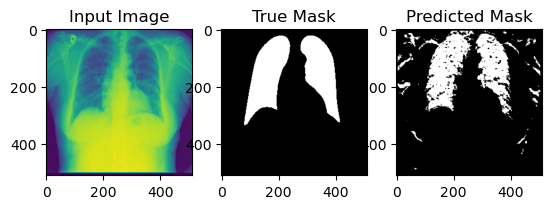

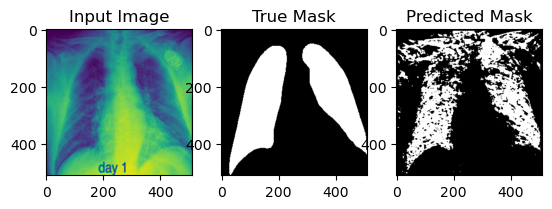

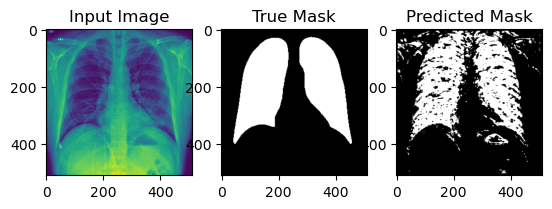

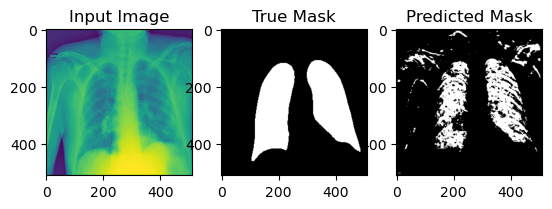

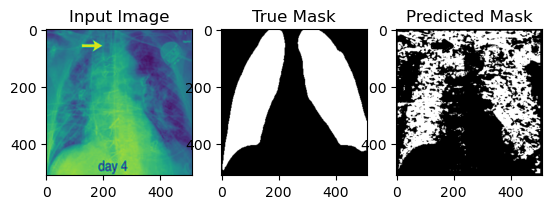

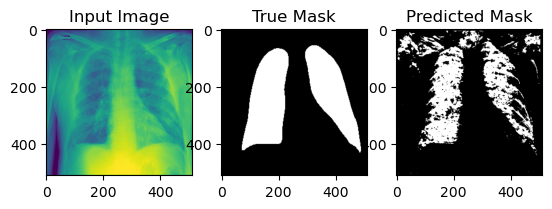

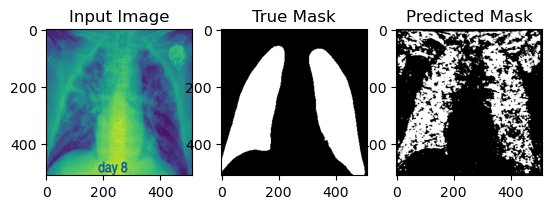

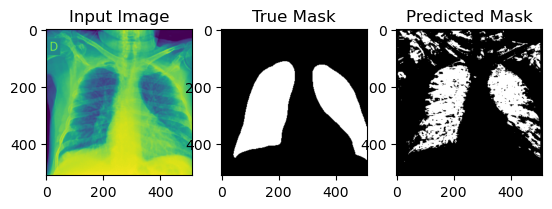

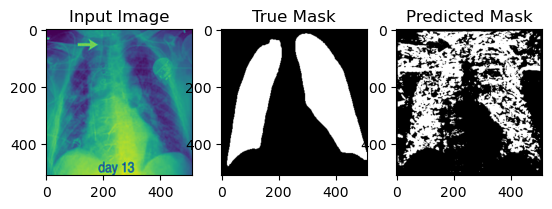

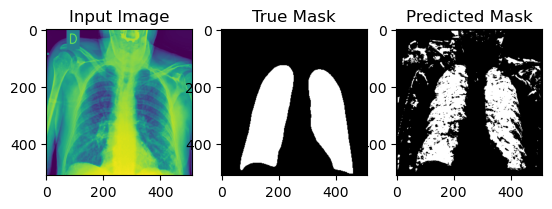

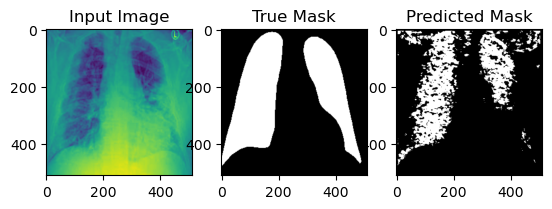

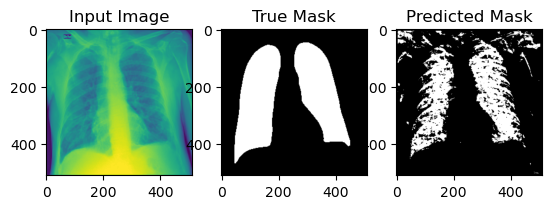

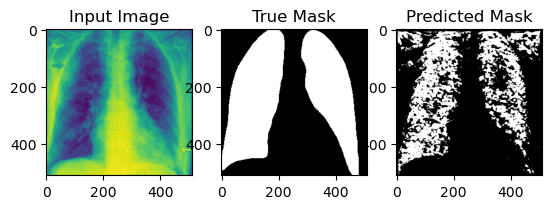

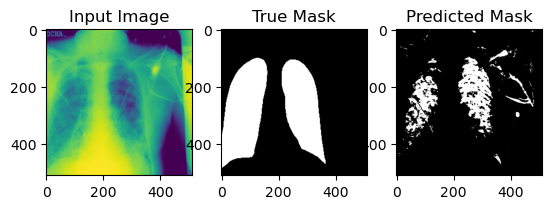

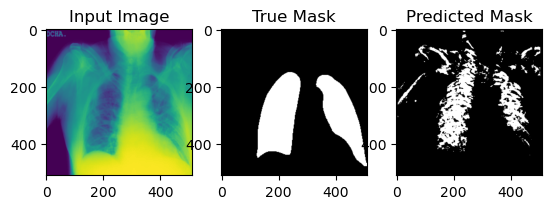

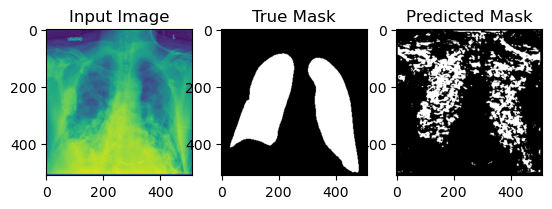

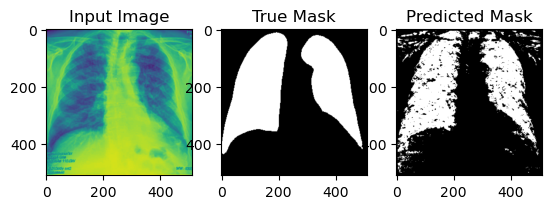

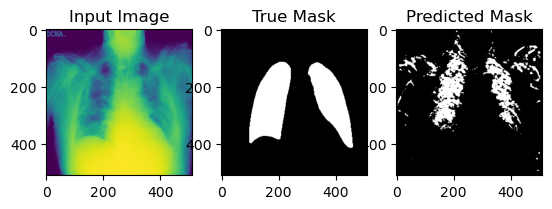

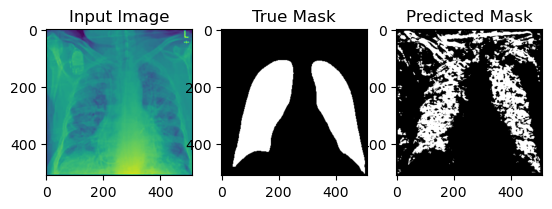

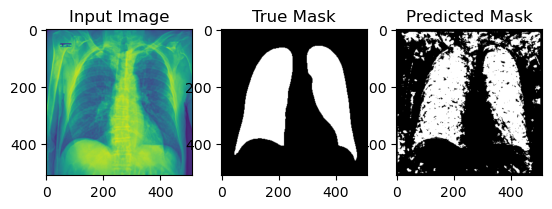

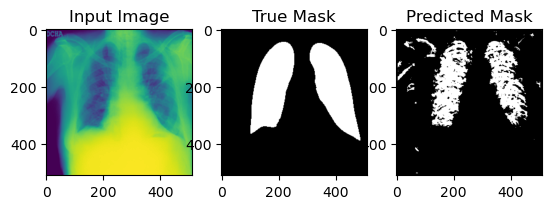

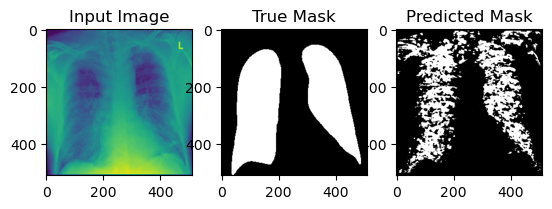

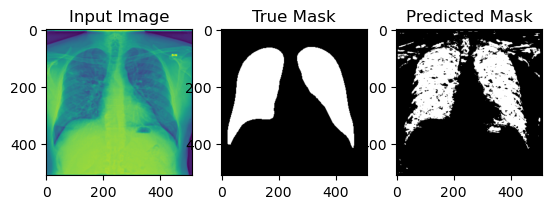

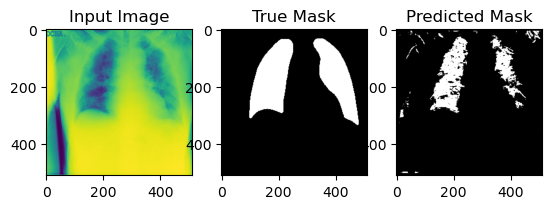

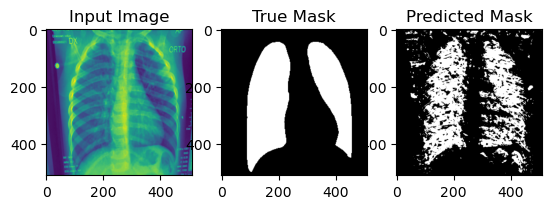

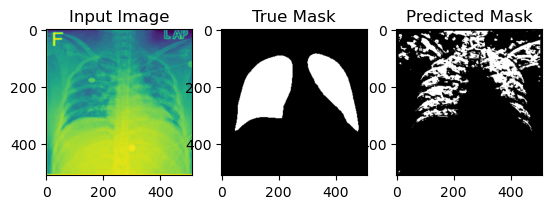

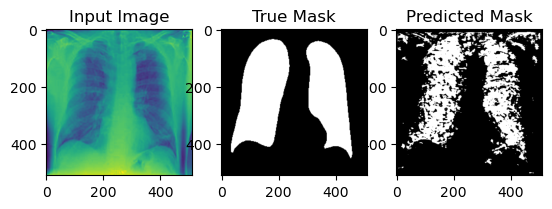

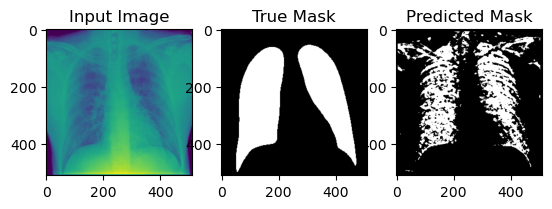

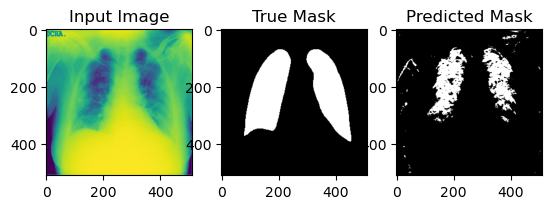

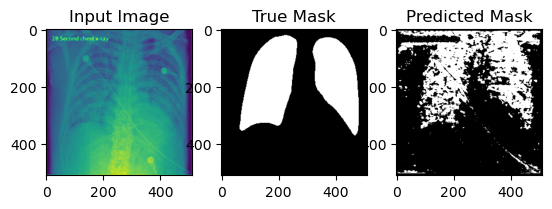

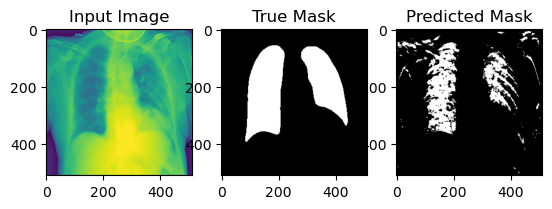

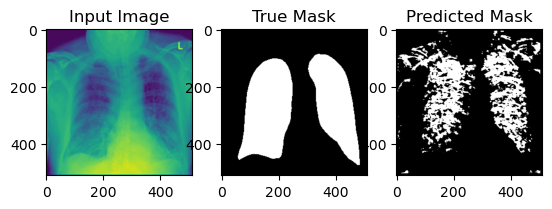

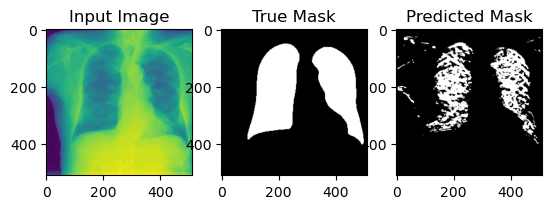

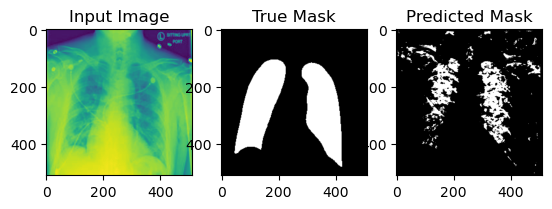

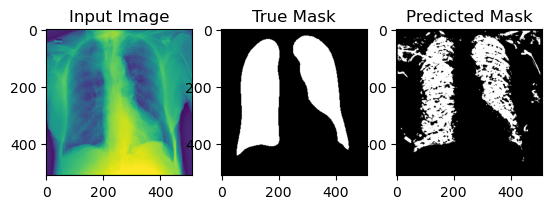

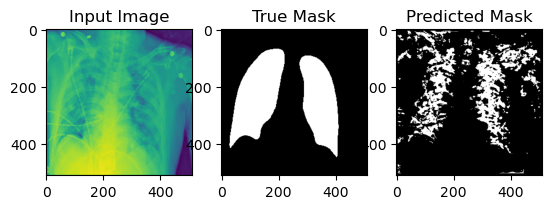

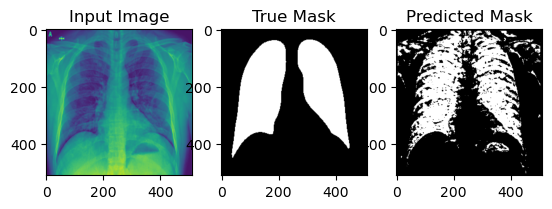

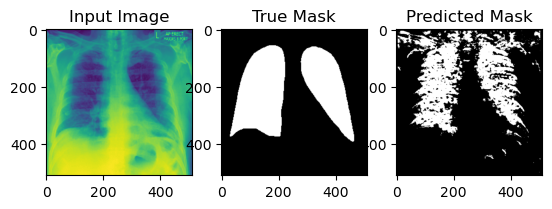

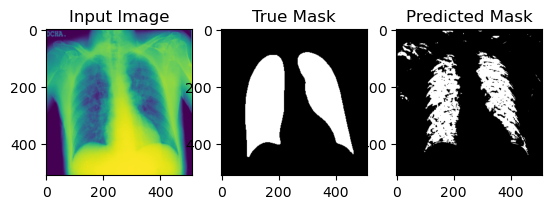

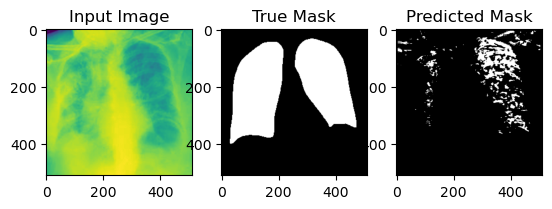

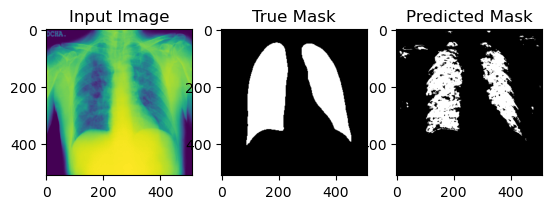

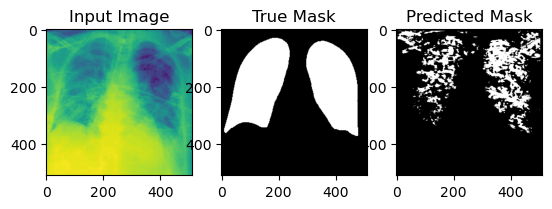

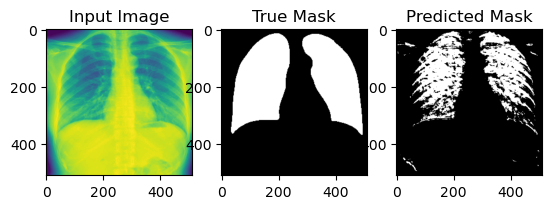

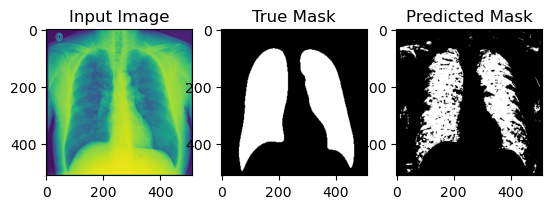

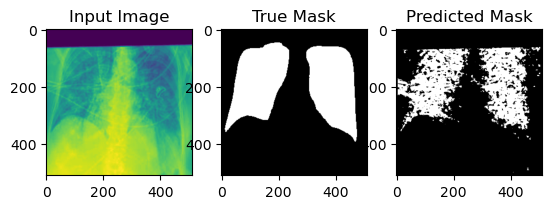

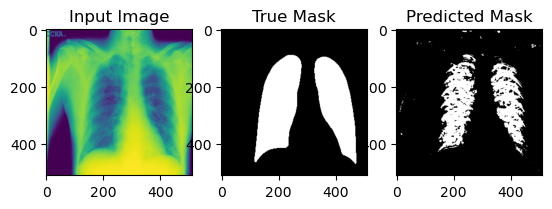

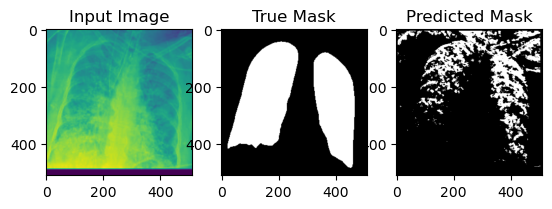

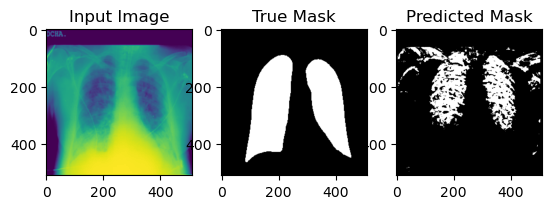

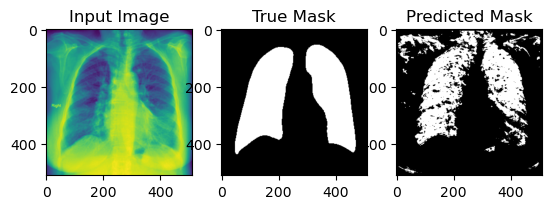

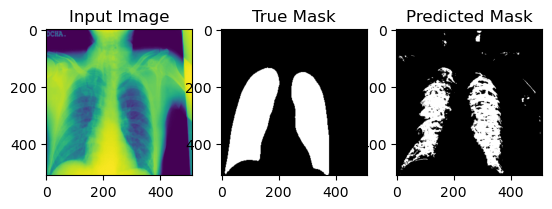

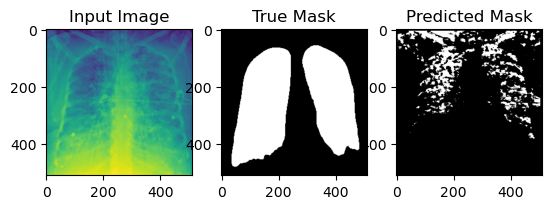

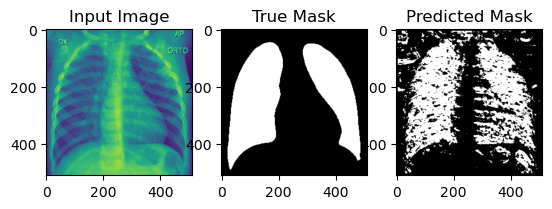

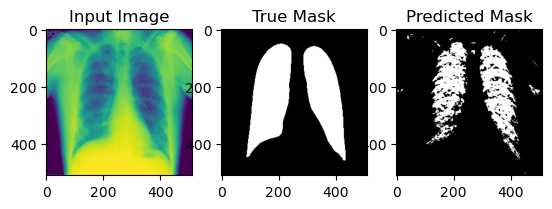

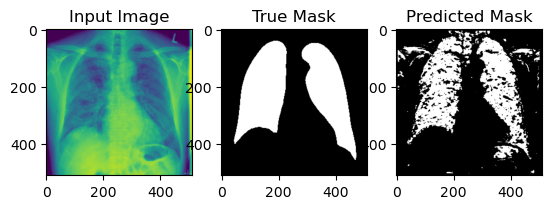

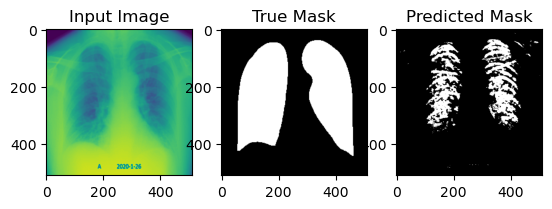

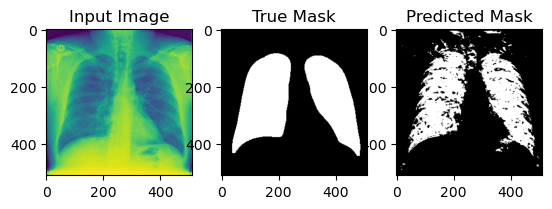

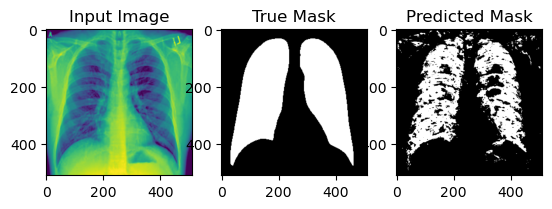

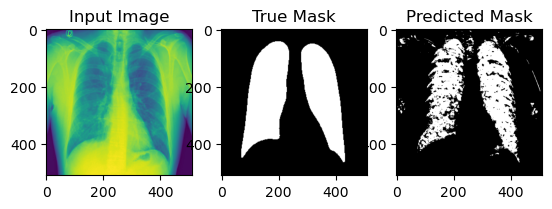

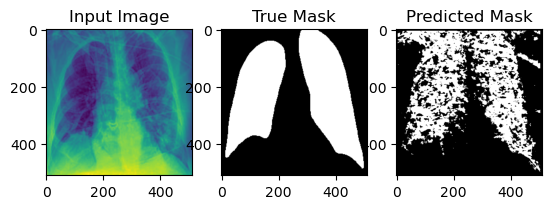

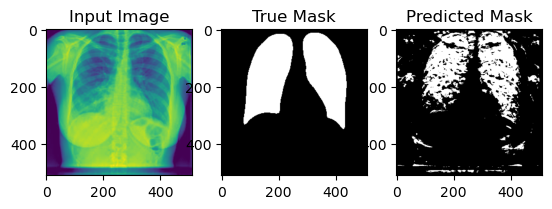

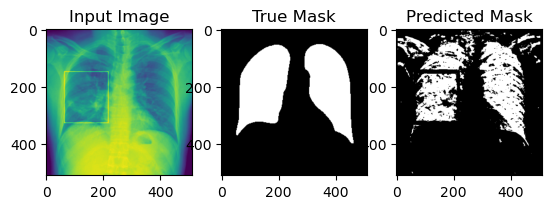

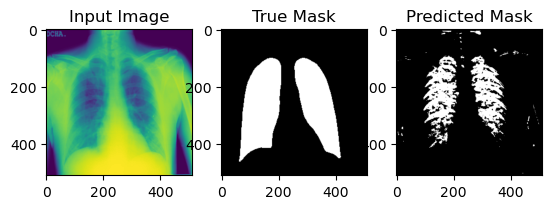

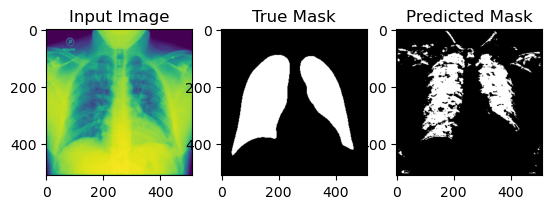

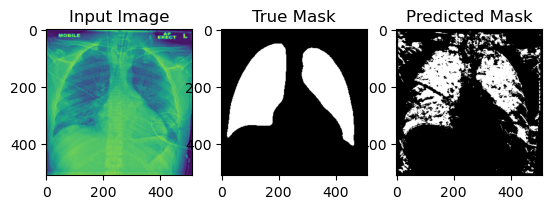

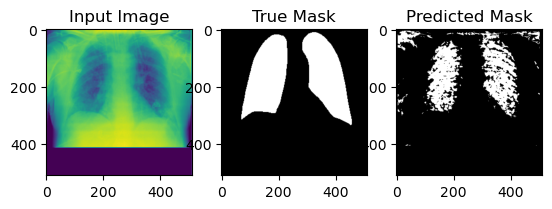

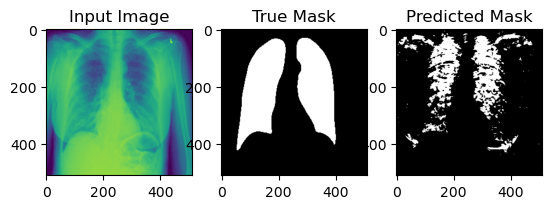

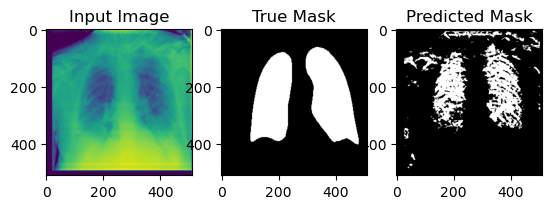

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmp13gi8le1kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpv8eq1af0kuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
R.classifier.model.metrics_names

['loss', 'dice_coeff']

In [26]:
BareBone.model.metrics_names

['loss', 'dice_coeff']